In [55]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [56]:
files_to_ignore = ['.DS_Store']
script_1_path = '../../model_results/gru_results/script_1/GRU_sl5/'
script_1_folders = os.listdir(script_1_path)
script_1_folders = [folder for folder in script_1_folders if folder not in files_to_ignore]
script_1_folders

['GRUs1_2023-09-18_14-02-23__904',
 'GRUs1_2023-09-20_22-36-05__2612',
 'GRUs1_2023-09-18_20-49-25__1508',
 'GRUs1_2023-09-22_16-26-36__3456',
 'final_merged_results',
 'GRUs1_2023-09-16_23-19-57__704']

In [57]:
results_path = f'{script_1_path}final_merged_results/'
df = pd.read_csv(f'{results_path}gru_script_1_gridSearch_results.csv')
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              1             1                5     32           0.0   
1              1             2                5     32           0.0   
2              1             3                5     32           0.0   
3              1             4                5     32           0.0   
4              1             5                5     32           0.0   
...          ...           ...              ...    ...           ...   
3235           1          3452                5    128           0.6   
3236           1          3453                5    128           0.6   
3237           1          3454                5    128           0.6   
3238           1          3455                5    128           0.6   
3239           1          3456                5    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
3235             softmax                     hinge      Adam         500   
3236             softmax                     hinge      Adam        1000   
3237             softmax                     hinge      Adam        1000   
3238             softmax                     hinge      Adam        1000   
3239             softmax                     hinge      Adam        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.3994  {0: 0.59, 1: 0.29, 2: 0.22}   
1           1024  ...         0.4258  {0: 0.58, 1: 0.31, 2: 0.18}   
2           2048  ...         0.4445  {0: 0.58, 1: 0.31, 2: 0.15}   
3           4096  ...         0.4694  {0: 0.59, 1: 0.32, 2: 0.17}   
4            512  ...         0.3712  {0: 0.58, 1: 0.28, 2: 0.19}   
...          ...  ...            ...                          ...   
3235        4096  ...         0.3471  {0: 0.61, 1: 0.28, 2: 0.17}   
3236         512  ...         0.3509  {0: 0.58, 1: 0.28, 2: 0.22}   
3237        1024  ...         0.3402  {0: 0.58, 1: 0.31, 2: 0.17}   
3238        2048  ...         0.3620   {0: 0.61, 1: 0.28, 2: 0.2}   
3239        4096  ...         0.3507  {0: 0.61, 1: 0.28, 2: 0.18}   

                    recall_values                    f1_scores  \
0     {0: 0.41, 1: 0.51, 2: 0.19}   {0: 0.48, 1: 0.37, 2: 0.2}   
1     {0: 0.48, 1: 0.51, 2: 0.09}  {0: 0.53, 1: 0.38, 2: 0.12}   
2     {0: 0.54, 1: 0.48, 2: 0.06}  {0: 0.56, 1: 0.38, 2: 0.08}   
3      {0: 0.61, 1: 0.4, 2: 0.08}   {0: 0.6, 1: 0.36, 2: 0.11}   
4      {0: 0.36, 1: 0.49, 2: 0.2}   {0: 0.45, 1: 0.36, 2: 0.2}   
...                           ...                          ...   
3235  {0: 0.28, 1: 0.57, 2: 0.21}  {0: 0.39, 1: 0.38, 2: 0.19}   
3236  {0: 0.28, 1: 0.55, 2: 0.27}  {0: 0.38, 1: 0.37, 2: 0.24}   
3237  {0: 0.26, 1: 0.56, 2: 0.27}  {0: 0.36, 1: 0.39, 2: 0.21}   
3238    {0: 0.3, 1: 0.6, 2: 0.21}   {0: 0.4, 1: 0.39, 2: 0.21}   
3239   {0: 0.3, 1: 0.52, 2: 0.26}   {0: 0.4, 1: 0.37, 2: 0.21}   

                                         macro_averages  \
0     {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
1     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
2     {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
4     {'precision': 0.35, 'recall': 0.35, 'f1_score'...   
...                                                 ...   
3235  {'precision': 0.35, 'recall': 0.35, 'f1_score'...   
3236  {'precision': 0.36, 'recall': 0.37, 'f1_score'...   
3237  {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
3238  {'precisio

In [58]:
df.dtypes

script_num                 int64
search_count               int64
sequence_length            int64
units                      int64
dropout_rate             float64
activation_function       object
loss_function             object
optimizer                 object
num_epochs                 int64
batch_size                 int64
seed_value                 int64
training_loss            float64
training_accuracy        float64
validation_loss          float64
validation_accuracy      float64
test_loss                float64
test_accuracy            float64
precision_values          object
recall_values             object
f1_scores                 object
macro_averages            object
weighted_averages         object
model_parameters          object
model_keys                object
classification_report     object
confusion_matrix          object
dtype: object

In [59]:
## Filter rows to get rid of certain parameter combinations
rows_to_remove = []

for indx, row in df.iterrows():
    if (row['activation_function'] == 'relu' and row['loss_function'] == 'categorical_crossentropy') or \
       (row['activation_function'] == 'relu' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'categorical_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'tanh' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam'):
        rows_to_remove.append(indx)

df.drop(rows_to_remove, inplace=True) 
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              1             1                5     32           0.0   
1              1             2                5     32           0.0   
2              1             3                5     32           0.0   
3              1             4                5     32           0.0   
4              1             5                5     32           0.0   
...          ...           ...              ...    ...           ...   
3223           1          3440                5    128           0.6   
3224           1          3441                5    128           0.6   
3225           1          3442                5    128           0.6   
3226           1          3443                5    128           0.6   
3227           1          3444                5    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
3223             softmax                     hinge       SGD         500   
3224             softmax                     hinge       SGD        1000   
3225             softmax                     hinge       SGD        1000   
3226             softmax                     hinge       SGD        1000   
3227             softmax                     hinge       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.3994  {0: 0.59, 1: 0.29, 2: 0.22}   
1           1024  ...         0.4258  {0: 0.58, 1: 0.31, 2: 0.18}   
2           2048  ...         0.4445  {0: 0.58, 1: 0.31, 2: 0.15}   
3           4096  ...         0.4694  {0: 0.59, 1: 0.32, 2: 0.17}   
4            512  ...         0.3712  {0: 0.58, 1: 0.28, 2: 0.19}   
...          ...  ...            ...                          ...   
3223        4096  ...         0.4282  {0: 0.58, 1: 0.28, 2: 0.06}   
3224         512  ...         0.4350   {0: 0.59, 1: 0.3, 2: 0.05}   
3225        1024  ...         0.4406   {0: 0.6, 1: 0.31, 2: 0.05}   
3226        2048  ...         0.4443    {0: 0.6, 1: 0.3, 2: 0.06}   
3227        4096  ...         0.4421  {0: 0.59, 1: 0.29, 2: 0.08}   

                    recall_values                    f1_scores  \
0     {0: 0.41, 1: 0.51, 2: 0.19}   {0: 0.48, 1: 0.37, 2: 0.2}   
1     {0: 0.48, 1: 0.51, 2: 0.09}  {0: 0.53, 1: 0.38, 2: 0.12}   
2     {0: 0.54, 1: 0.48, 2: 0.06}  {0: 0.56, 1: 0.38, 2: 0.08}   
3      {0: 0.61, 1: 0.4, 2: 0.08}   {0: 0.6, 1: 0.36, 2: 0.11}   
4      {0: 0.36, 1: 0.49, 2: 0.2}   {0: 0.45, 1: 0.36, 2: 0.2}   
...                           ...                          ...   
3223    {0: 0.5, 1: 0.53, 2: 0.0}   {0: 0.54, 1: 0.37, 2: 0.0}   
3224    {0: 0.48, 1: 0.6, 2: 0.0}   {0: 0.53, 1: 0.4, 2: 0.01}   
3225    {0: 0.49, 1: 0.6, 2: 0.0}   {0: 0.54, 1: 0.41, 2: 0.0}   
3226    {0: 0.5, 1: 0.59, 2: 0.0}    {0: 0.55, 1: 0.4, 2: 0.0}   
3227   {0: 0.53, 1: 0.53, 2: 0.0}   {0: 0.55, 1: 0.38, 2: 0.0}   

                                         macro_averages  \
0     {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
1     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
2     {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
4     {'precision': 0.35, 'recall': 0.35, 'f1_score'...   
...                                                 ...   
3223  {'precision': 0.3, 'recall': 0.34, 'f1_score':...   
3224  {'precision': 0.32, 'recall': 0.36, 'f1_score'...   
3225  {'precision': 0.32, 'recall': 0.36, 'f1_score'...   
3226  {'precisio

In [60]:
top_n_model_test_accuracies = df['test_accuracy'].nlargest(100)
top_n_model_test_accuracy_indexes = top_n_model_test_accuracies.index

In [61]:
top_n_model_test_accuracy_indexes

Index([1033, 2122,  984,  989,  994,  747, 1032,  995, 2137, 2142, 2147,  990,
        985, 2143, 2138,  707, 2136, 2141, 1853, 2146,  697, 1858,  702, 1848,
       1906,  978,  746,  963, 2139,  967, 1045,  703, 2140, 1037,  983,  698,
       1541, 2404, 2145, 1545,  991,  986, 1855, 1850, 1849, 1859, 1854, 1560,
        100,  987, 2116, 1565,  410,   96,  415, 1589,  973, 1570,  750, 2166,
        465,  699, 3125,  409,  414,  419, 1898, 3134,  411, 2118, 3129,  104,
       3121,  458, 2449, 2913, 1593,  677, 3130, 2169, 2195,  696,  123,  751,
       2480,  706, 1872, 3122, 1851,  462,  701,  974, 2453, 1585, 2915, 2162,
       2692, 1592,  890, 1106],
      dtype='int64')

In [62]:
top_n_models = df.loc[top_n_model_test_accuracy_indexes]
print(type(top_n_models))
top_n_models

<class 'pandas.core.frame.DataFrame'>


script_num  search_count  sequence_length  units  dropout_rate  \
1033           1          1034                5     32           0.6   
2122           1          2123                5     64           0.6   
984            1           985                5     32           0.6   
989            1           990                5     32           0.6   
994            1           995                5     32           0.6   
...          ...           ...              ...    ...           ...   
2162           1          2163                5     64           0.6   
2692           1          2693                5    128           0.2   
1592           1          1593                5     64           0.2   
890            1           891                5     32           0.6   
1106           1          1107                5     32           0.6   

     activation_function             loss_function optimizer  num_epochs  \
1033                tanh       binary_crossentropy       SGD         250   
2122                relu       binary_crossentropy       SGD        1000   
984                 relu                     hinge       SGD         250   
989                 relu                     hinge       SGD         500   
994                 relu                     hinge       SGD        1000   
...                  ...                       ...       ...         ...   
2162                tanh  categorical_crossentropy       SGD         250   
2692                relu       binary_crossentropy       SGD         500   
1592                tanh  categorical_crossentropy       SGD        1000   
890              sigmoid       binary_crossentropy       SGD         250   
1106             softmax       binary_crossentropy       SGD         250   

      batch_size  ...  test_accuracy             precision_values  \
1033        1024  ...         0.5996   {0: 0.61, 1: 0.53, 2: 0.0}   
2122        2048  ...         0.5948    {0: 0.6, 1: 0.53, 2: 0.0}   
984          512  ...         0.5931   {0: 0.61, 1: 0.48, 2: 0.0}   
989         1024  ...         0.5928   {0: 0.61, 1: 0.48, 2: 0.0}   
994         2048  ...         0.5928   {0: 0.61, 1: 0.48, 2: 0.0}   
...          ...  ...            ...                          ...   
2162        2048  ...         0.5457   {0: 0.58, 1: 0.3, 2: 0.27}   
2692         512  ...         0.5452  {0: 0.57, 1: 0.28, 2: 0.19}   
1592         512  ...         0.5438   {0: 0.58, 1: 0.26, 2: 0.2}   
890         2048  ...         0.5431   {0: 0.6, 1: 0.35, 2: 0.19}   
1106        2048  ...         0.5431   {0: 0.6, 1: 0.35, 2: 0.19}   

                    recall_values                    f1_scores  \
1033   {0: 0.97, 1: 0.16, 2: 0.0}   {0: 0.75, 1: 0.25, 2: 0.0}   
2122   {0: 0.97, 1: 0.14, 2: 0.0}   {0: 0.74, 1: 0.22, 2: 0.0}   
984    {0: 0.94, 1: 0.21, 2: 0.0}   {0: 0.74, 1: 0.29, 2: 0.0}   
989    {0: 0.93, 1: 0.22, 2: 0.0}    {0: 0.74, 1: 0.3, 2: 0.0}   
994    {0: 0.93, 1: 0.22, 2: 0.0}    {0: 0.74, 1: 0.3, 2: 0.0}   
...                           ...                          ...   
2162   {0: 0.88, 1: 0.1, 2: 0.07}   {0: 0.7, 1: 0.15, 2: 0.11}   
2692   {0: 0.93, 1: 0.0, 2: 0.07}    {0: 0.71, 1: 0.0, 2: 0.1}   
1592   {0: 0.9, 1: 0.07, 2: 0.05}  {0: 0.71, 1: 0.11, 2: 0.08}   
890   {0: 0.81, 1: 0.29, 2: 0.01}  {0: 0.69, 1: 0.32, 2: 0.02}   
1106  {0: 0.81, 1: 0.29, 2: 0.01}  {0: 0.69, 1: 0.32, 2: 0.02}   

                                         macro_averages  \
1033  {'precision': 0.38, 'recall': 0.38, 'f1_score'...   
2122  {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
984   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
989   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
994   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
...                                                 ...   
2162  {'precision': 0.38, 'recall': 0.35, 'f1_score'...   
2692  {'precision': 0.35, 'recall': 0.33, 'f1_score'...   
1592  {'precision': 0.35, 'recall': 0.34, 'f1_score'...   
890   {'precisio

In [63]:
# top_n_models.to_csv('./LSTM_s1_top_100_model_data.csv')

In [64]:
# Filter models that have a training and test accuracy difference of more than 10%

for indx, row in top_n_models.iterrows():
    if abs(row['test_accuracy'] - row['training_accuracy']) > 0.1:
        print(abs(row['test_accuracy'] - row['training_accuracy']))
        top_n_models.drop(indx, inplace = True)

In [65]:
top_n_models

script_num  search_count  sequence_length  units  dropout_rate  \
1033           1          1034                5     32           0.6   
2122           1          2123                5     64           0.6   
984            1           985                5     32           0.6   
989            1           990                5     32           0.6   
994            1           995                5     32           0.6   
...          ...           ...              ...    ...           ...   
2162           1          2163                5     64           0.6   
2692           1          2693                5    128           0.2   
1592           1          1593                5     64           0.2   
890            1           891                5     32           0.6   
1106           1          1107                5     32           0.6   

     activation_function             loss_function optimizer  num_epochs  \
1033                tanh       binary_crossentropy       SGD         250   
2122                relu       binary_crossentropy       SGD        1000   
984                 relu                     hinge       SGD         250   
989                 relu                     hinge       SGD         500   
994                 relu                     hinge       SGD        1000   
...                  ...                       ...       ...         ...   
2162                tanh  categorical_crossentropy       SGD         250   
2692                relu       binary_crossentropy       SGD         500   
1592                tanh  categorical_crossentropy       SGD        1000   
890              sigmoid       binary_crossentropy       SGD         250   
1106             softmax       binary_crossentropy       SGD         250   

      batch_size  ...  test_accuracy             precision_values  \
1033        1024  ...         0.5996   {0: 0.61, 1: 0.53, 2: 0.0}   
2122        2048  ...         0.5948    {0: 0.6, 1: 0.53, 2: 0.0}   
984          512  ...         0.5931   {0: 0.61, 1: 0.48, 2: 0.0}   
989         1024  ...         0.5928   {0: 0.61, 1: 0.48, 2: 0.0}   
994         2048  ...         0.5928   {0: 0.61, 1: 0.48, 2: 0.0}   
...          ...  ...            ...                          ...   
2162        2048  ...         0.5457   {0: 0.58, 1: 0.3, 2: 0.27}   
2692         512  ...         0.5452  {0: 0.57, 1: 0.28, 2: 0.19}   
1592         512  ...         0.5438   {0: 0.58, 1: 0.26, 2: 0.2}   
890         2048  ...         0.5431   {0: 0.6, 1: 0.35, 2: 0.19}   
1106        2048  ...         0.5431   {0: 0.6, 1: 0.35, 2: 0.19}   

                    recall_values                    f1_scores  \
1033   {0: 0.97, 1: 0.16, 2: 0.0}   {0: 0.75, 1: 0.25, 2: 0.0}   
2122   {0: 0.97, 1: 0.14, 2: 0.0}   {0: 0.74, 1: 0.22, 2: 0.0}   
984    {0: 0.94, 1: 0.21, 2: 0.0}   {0: 0.74, 1: 0.29, 2: 0.0}   
989    {0: 0.93, 1: 0.22, 2: 0.0}    {0: 0.74, 1: 0.3, 2: 0.0}   
994    {0: 0.93, 1: 0.22, 2: 0.0}    {0: 0.74, 1: 0.3, 2: 0.0}   
...                           ...                          ...   
2162   {0: 0.88, 1: 0.1, 2: 0.07}   {0: 0.7, 1: 0.15, 2: 0.11}   
2692   {0: 0.93, 1: 0.0, 2: 0.07}    {0: 0.71, 1: 0.0, 2: 0.1}   
1592   {0: 0.9, 1: 0.07, 2: 0.05}  {0: 0.71, 1: 0.11, 2: 0.08}   
890   {0: 0.81, 1: 0.29, 2: 0.01}  {0: 0.69, 1: 0.32, 2: 0.02}   
1106  {0: 0.81, 1: 0.29, 2: 0.01}  {0: 0.69, 1: 0.32, 2: 0.02}   

                                         macro_averages  \
1033  {'precision': 0.38, 'recall': 0.38, 'f1_score'...   
2122  {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
984   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
989   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
994   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
...                                                 ...   
2162  {'precision': 0.38, 'recall': 0.35, 'f1_score'...   
2692  {'precision': 0.35, 'recall': 0.33, 'f1_score'...   
1592  {'precision': 0.35, 'recall': 0.34, 'f1_score'...   
890   {'precisio

In [66]:
def search_file_recursive(folder_path, target_file):
    for root, _, files in os.walk(folder_path):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

top_n_model_parameters = []
top_n_unique_model_parameters = []
seen = set()

for indx, row in top_n_models.iterrows():
    cm = row['confusion_matrix']
    parameter = re.split(r'confusion_matrix_(.*?)_\d+\.png', cm)[1]
    top_n_model_parameters.append((indx, parameter))
    if parameter not in seen:
        top_n_unique_model_parameters.append((indx, parameter))
        seen.add(parameter)

# DataFrame with the unique models
top_n_unique_models_df = top_n_models.loc[[indx for indx, _ in top_n_unique_model_parameters]]

print('# of Top N model parameters', len(top_n_model_parameters))
print('# of Unique Top N model parameters', len(top_n_unique_model_parameters))

processed_parameters = set()  # To keep track of processed model_parameters

for parameter in top_n_unique_model_parameters:
    indx, model_parameter = parameter
    for folder in sorted(script_1_folders):
        folder_path = f'{script_1_path}{folder}'
        found_path = search_file_recursive(folder_path, f'batch_size_comparison_{model_parameter}.png')
        if found_path:
            # Check if the model_parameter has already been processed
            if model_parameter in processed_parameters:
                continue  # Skip processing this model_parameter again

            batch_size_path = found_path
            top_n_unique_models_df.at[indx, 'model_parameter'] = model_parameter
            top_n_unique_models_df.at[indx, 'batch_size_path'] = batch_size_path
            
            # Mark the model_parameter as processed
            processed_parameters.add(model_parameter)

# of Top N model parameters 100
# of Unique Top N model parameters 62


In [67]:
top_n_unique_models_df.to_csv(f'{results_path}gru_script_1_unique_top_n_models.csv')
top_n_unique_models_df

script_num  search_count  sequence_length  units  dropout_rate  \
1033           1          1034                5     32           0.6   
2122           1          2123                5     64           0.6   
984            1           985                5     32           0.6   
989            1           990                5     32           0.6   
994            1           995                5     32           0.6   
...          ...           ...              ...    ...           ...   
1585           1          1586                5     64           0.2   
2162           1          2163                5     64           0.6   
2692           1          2693                5    128           0.2   
890            1           891                5     32           0.6   
1106           1          1107                5     32           0.6   

     activation_function             loss_function optimizer  num_epochs  \
1033                tanh       binary_crossentropy       SGD         250   
2122                relu       binary_crossentropy       SGD        1000   
984                 relu                     hinge       SGD         250   
989                 relu                     hinge       SGD         500   
994                 relu                     hinge       SGD        1000   
...                  ...                       ...       ...         ...   
1585                tanh  categorical_crossentropy       SGD         250   
2162                tanh  categorical_crossentropy       SGD         250   
2692                relu       binary_crossentropy       SGD         500   
890              sigmoid       binary_crossentropy       SGD         250   
1106             softmax       binary_crossentropy       SGD         250   

      batch_size  ...                recall_values  \
1033        1024  ...   {0: 0.97, 1: 0.16, 2: 0.0}   
2122        2048  ...   {0: 0.97, 1: 0.14, 2: 0.0}   
984          512  ...   {0: 0.94, 1: 0.21, 2: 0.0}   
989         1024  ...   {0: 0.93, 1: 0.22, 2: 0.0}   
994         2048  ...   {0: 0.93, 1: 0.22, 2: 0.0}   
...          ...  ...                          ...   
1585        1024  ...  {0: 0.92, 1: 0.05, 2: 0.05}   
2162        2048  ...   {0: 0.88, 1: 0.1, 2: 0.07}   
2692         512  ...   {0: 0.93, 1: 0.0, 2: 0.07}   
890         2048  ...  {0: 0.81, 1: 0.29, 2: 0.01}   
1106        2048  ...  {0: 0.81, 1: 0.29, 2: 0.01}   

                        f1_scores  \
1033   {0: 0.75, 1: 0.25, 2: 0.0}   
2122   {0: 0.74, 1: 0.22, 2: 0.0}   
984    {0: 0.74, 1: 0.29, 2: 0.0}   
989     {0: 0.74, 1: 0.3, 2: 0.0}   
994     {0: 0.74, 1: 0.3, 2: 0.0}   
...                           ...   
1585  {0: 0.71, 1: 0.09, 2: 0.08}   
2162   {0: 0.7, 1: 0.15, 2: 0.11}   
2692    {0: 0.71, 1: 0.0, 2: 0.1}   
890   {0: 0.69, 1: 0.32, 2: 0.02}   
1106  {0: 0.69, 1: 0.32, 2: 0.02}   

                                         macro_averages  \
1033  {'precision': 0.38, 'recall': 0.38, 'f1_score'...   
2122  {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
984   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
989   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
994   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
...                                                 ...   
1585  {'precision': 0.35, 'recall': 0.34, 'f1_score'...   
2162  {'precision': 0.38, 'recall': 0.35, 'f1_score'...   
2692  {'precision': 0.35, 'recall': 0.33, 'f1_score'...   
890   {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
1106  {'precision': 0.38, 'recall': 0.37, 'f1_score'...   

                                      weighted_averages  \
1033  {'precision': 0.49, 'recall': 0.6, 'f1_score':...   
2122  {'precision': 0.49, 'recall': 0.59, 'f1_score'...   
984   {'precision': 0.48, 'recall': 0.59, 'f1_score'...   
989   {'precision': 0.48, 'recall': 0.59, 'f1_score'...   
994   {'precision': 0.48, 'recall': 0.59, 'f1_score'...   
...                                                 ...   
1585  {'prec

In [68]:
max(top_n_unique_models_df['test_accuracy'])

0.5996

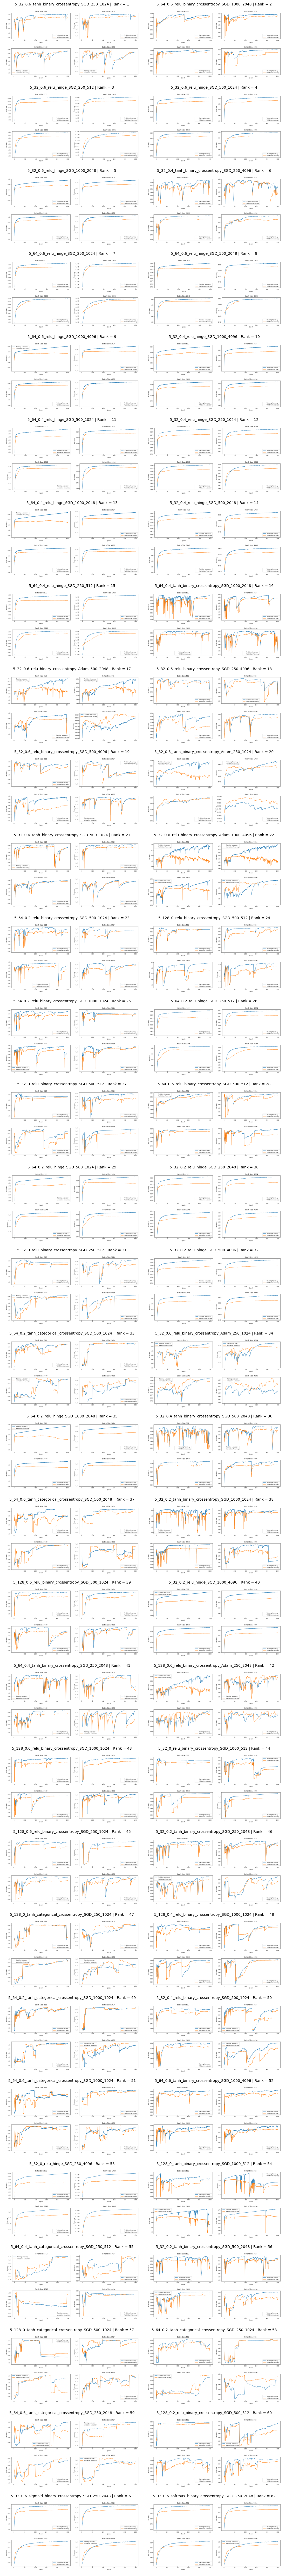

In [69]:
import math
# Define the number of rows and columns
num_rows = math.ceil(len(top_n_unique_model_parameters) / 2)
num_cols = 2

# Calculate the figure size based on the image dimensions
image_width = 1500  # Width of your images
image_height = 800  # Height of your images
fig_width = 12  # Adjust this based on your preference
fig_height = (fig_width / image_width) * image_height * num_rows / num_cols

# Create the figure and subplots
figure, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for indx, row in top_n_unique_models_df.iterrows():
    row_indx = i // num_cols
    col_indx = i % num_cols
    i += 1
    ax = axs[row_indx, col_indx]
    
    model_parameter = row['model_parameter']
    fig_path = row['batch_size_path']
    img = Image.open(fig_path)
#     ax.imshow(img)

    
    # Display the image at its original aspect ratio
    ax.imshow(img)
    parameter = re.split(r'confusion_matrix_(.*?).png', row['confusion_matrix'])[1]
    ax.set_title(f'{parameter} | Rank = {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{results_path}gru_script_1_top_n_model_train_val_accuracies.png')
plt.show()

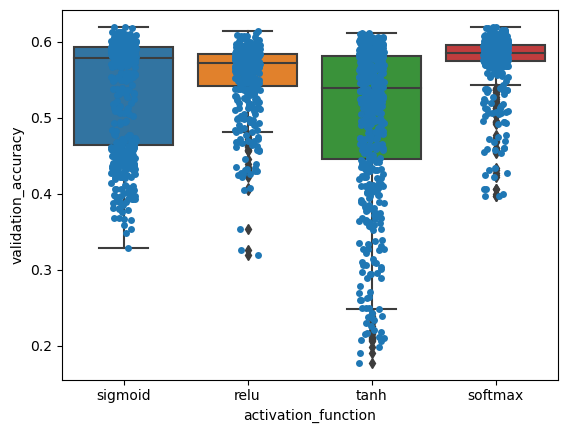

In [70]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='validation_accuracy', data=df)
sns.stripplot(x='activation_function', y='validation_accuracy', data=df)
plt.show()

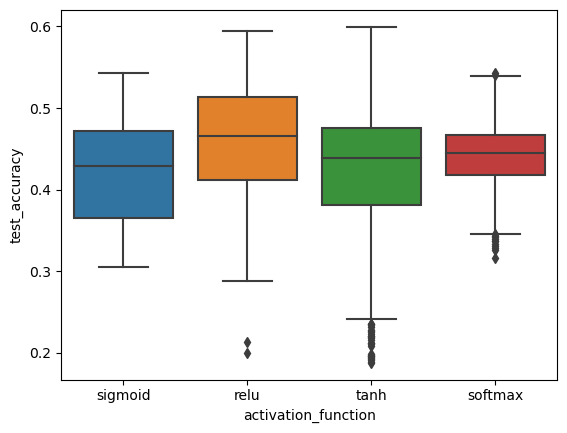

In [71]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='test_accuracy', data=df)
# sns.stripplot(x='activation_function', y='test_accuracy', data=df)
plt.show()